In [34]:
#importing libraries
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
#importing the dataset
df = pd.read_csv(r'D:\Data Analytics\Project-1\data.csv\data.csv', encoding= 'unicode_escape', low_memory=False)

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom


In [37]:
def check_df(dataframe, head=5):
    print("########## Info #############")
    print(dataframe.info())
    print("########## Shape #############")
    print(dataframe.shape)
    print("########## Data Types #############")
    print(dataframe.dtypes)
    print("########## Head of Data #############")
    print(dataframe.head(head))
    print("########## Tail of Data #############")
    print(dataframe.tail(head))
    print("########## Null Values of Data #############")
    print(dataframe.isnull().sum())
    print("########## Describe of the Numerical Datas #############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
########## Shape #############
(541909, 8)
########## Data Types #############
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
########## Head of Data #############
  InvoiceNo StockCode                          

In [38]:
#Checkinf for null Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
#Removing all the null values from data
df.dropna(inplace=True)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.000,12.061,248.693,-80995.000,2.000,5.000,12.000,80995.000
UnitPrice,406829.000,3.460,69.315,0.000,1.250,1.950,3.750,38970.000
CustomerID,406829.000,15287.691,1713.600,12346.000,13953.000,15152.000,16791.000,18287.000


In [41]:
df = df[~df["InvoiceNo"].str.contains("C", na = False)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.000,13.022,180.420,1.000,2.000,6.000,12.000,80995.000
UnitPrice,397924.000,3.116,22.097,0.000,1.250,1.950,3.750,8142.750
CustomerID,397924.000,15294.315,1713.170,12346.000,13969.000,15159.000,16795.000,18287.000


In [42]:
#converting InvoiceDate to Date datatype
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [43]:
#We need last order date to find recency value
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [44]:
new_date = dt.datetime(2011, 12, 11)

In [45]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [46]:
#Calculating Recency, Frequency and Monetary values
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (new_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': 'sum',
                                     'Description': 'sum'})

In [47]:
rfm.columns = ["recency", "frequency", "monetary", "description"]
rfm.head()

,recency,frequency,monetary,description
CustomerID,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...


In [48]:
#ignoring the monetary values that are equal to 0.
rfm = rfm[rfm["monetary"] >0]

In [49]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"]       = (rfm['recency_score'].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11


In [50]:
#Creating Segmentation Map
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11,hibernating
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55,champions
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24,at_Risk
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41,promising
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11,hibernating


In [51]:
rfm["segment"].value_counts()

hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: segment, dtype: int64

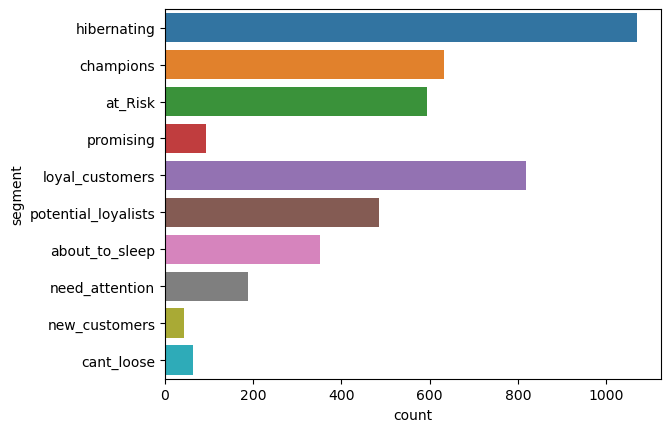

In [55]:
## Displaying segment types
sns.countplot(y ='segment', data = rfm)
plt.show()